In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', y_train.shape, ' , t_test.shape = ', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


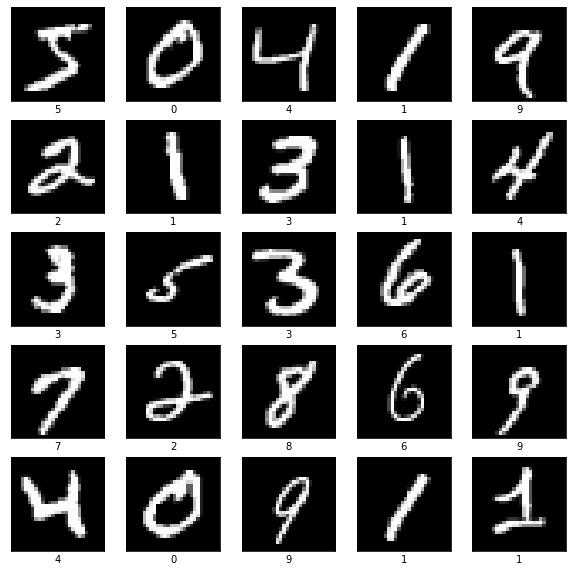

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))

plt.show()

In [4]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# 학습전 feature map 시각화

In [8]:
for layer in model.layers:

    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d (None, 28, 28, 32)
conv2d_1 (None, 14, 14, 64)
conv2d_2 (None, 7, 7, 128)


In [9]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [10]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output) 

partial_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


9619


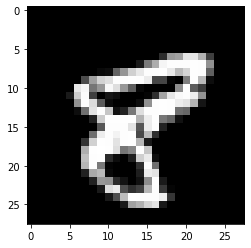

In [12]:
random_idx = np.random.randint(0, len(x_test))

print(random_idx)

plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray') 

In [13]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map.shape)

fm = feature_map[0]  # 0번 이미지의 특징 맵을 시각화

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


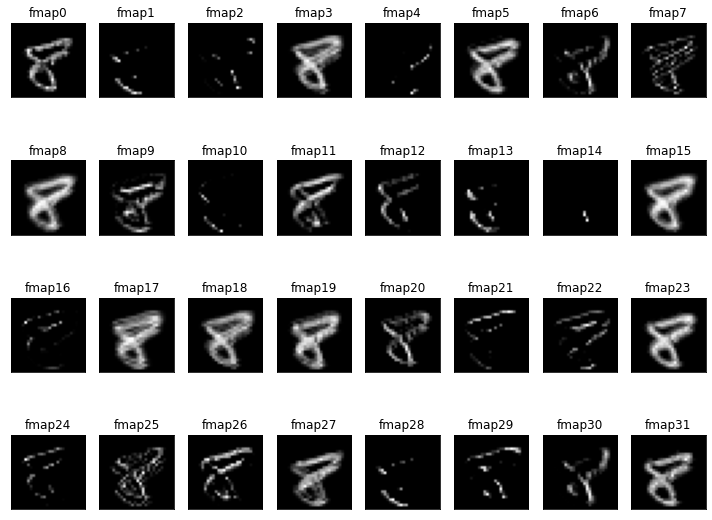

In [14]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

# 학습전 pooling map 시각화

In [15]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output) 

partial_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [16]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map.shape)

pm = pooling_map[0]  # 0번 이미지의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


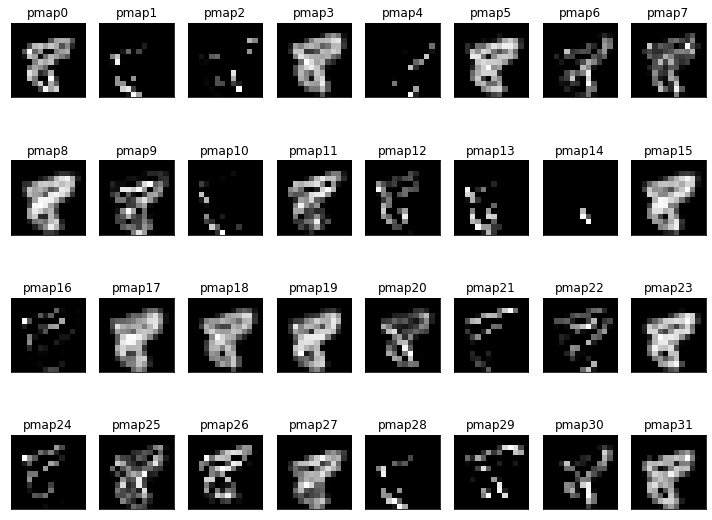

In [17]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()

# 모델 학습

In [18]:
start_time = datetime.now()

hist = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
938/938 [==============================] - 6s 5ms/step - loss: 0.2272 - accuracy: 0.9262 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0299 - val_accuracy: 0.9895
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.0330 - val_accuracy: 0.9887
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0284 - val_accuracy: 0.9909
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0218 - val_accuracy: 0.9924
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0204 - val_accuracy: 0.9936
Epoch 

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0213 - accuracy: 0.9940


[0.021286137402057648, 0.9940000176429749]

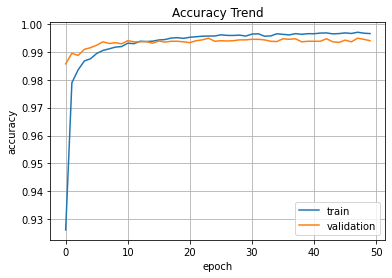

In [20]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

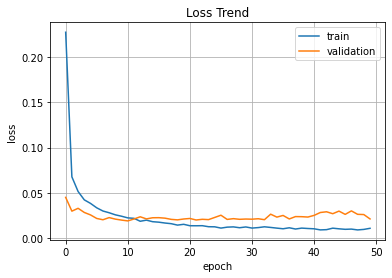

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

# 1st feature map 시각화

In [22]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [23]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 0 번째 층만 떼어냄

feature_map_1st_model = Model(inputs=model.inputs, outputs=model.layers[0].output) 

feature_map_1st_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [24]:
feature_map_1st = feature_map_1st_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map_1st.shape)

fm = feature_map_1st[0]  # 0번 영상의 특징 맵을 시각화

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


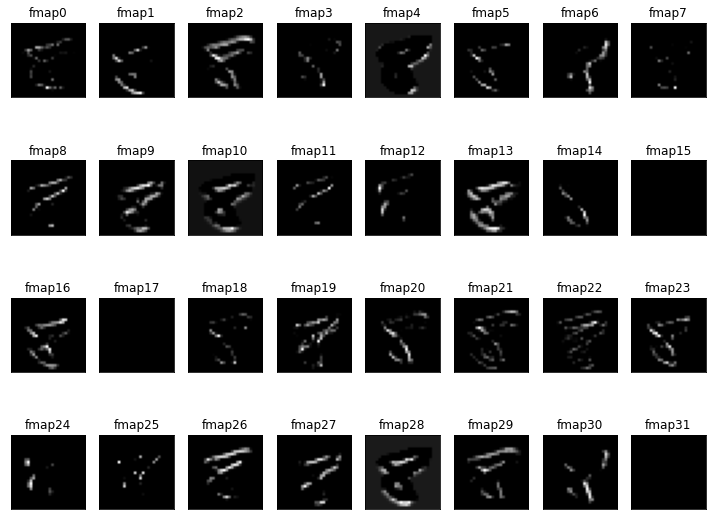

In [25]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

# 학습 후 1st pooling map 시각화

In [26]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [27]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

pooling_map_1st_model=Model(inputs=model.inputs, outputs=model.layers[1].output) 

pooling_map_1st_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [28]:
pooling_map_1st = pooling_map_1st_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map_1st.shape)

pm = pooling_map_1st[0]  # 0번 영상의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


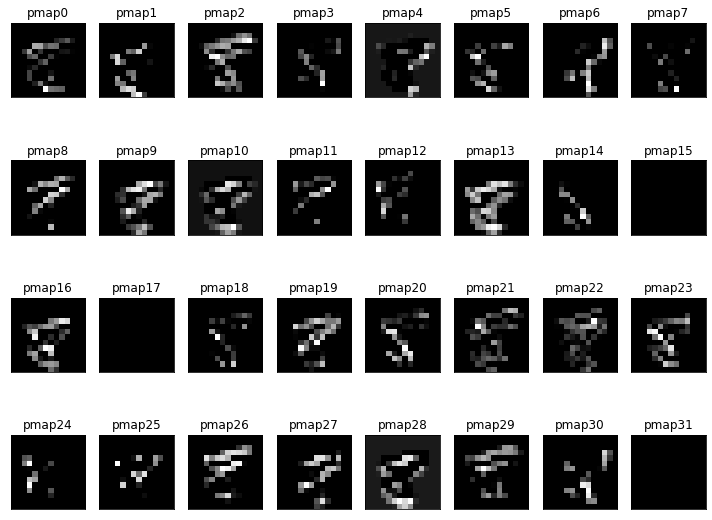

In [29]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()

# 2nd feature map 시각화

In [31]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [32]:
from tensorflow.keras.models import Model

feature_map_2nd_model = Model(inputs=model.inputs, outputs=model.layers[3].output) 

feature_map_2nd_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_______________________________________________________

In [33]:
feature_map_2nd = feature_map_2nd_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map_2nd.shape)

fm = feature_map_2nd[0]  # 0번 영상의 특징 맵을 시각화

print(fm.shape)

(1, 14, 14, 64)
(14, 14, 64)


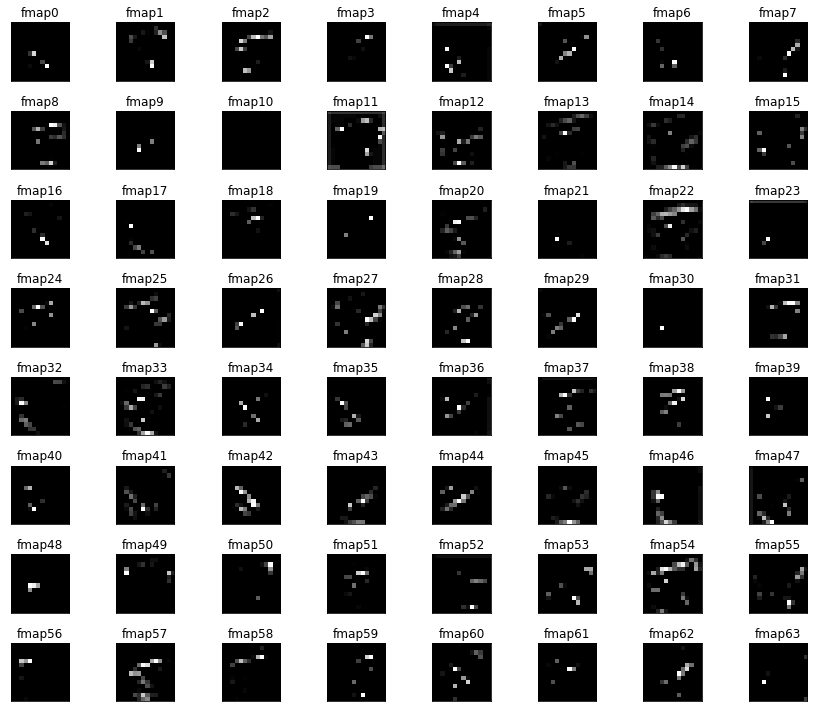

In [34]:
plt.figure(figsize=(12, 10))

for i in range(64): # i번째 특징 맵

    plt.subplot(8,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

# 2nd pooling map 시각화

In [35]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [37]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

pooling_map_2nd_model=Model(inputs=model.inputs, outputs=model.layers[4].output) 

pooling_map_2nd_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                       

In [38]:
pooling_map_2nd = pooling_map_2nd_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map_2nd.shape)

pm = pooling_map_2nd[0]  # 0번 영상의 풀링 맵을 시각화

print(pm.shape)

(1, 7, 7, 64)
(7, 7, 64)


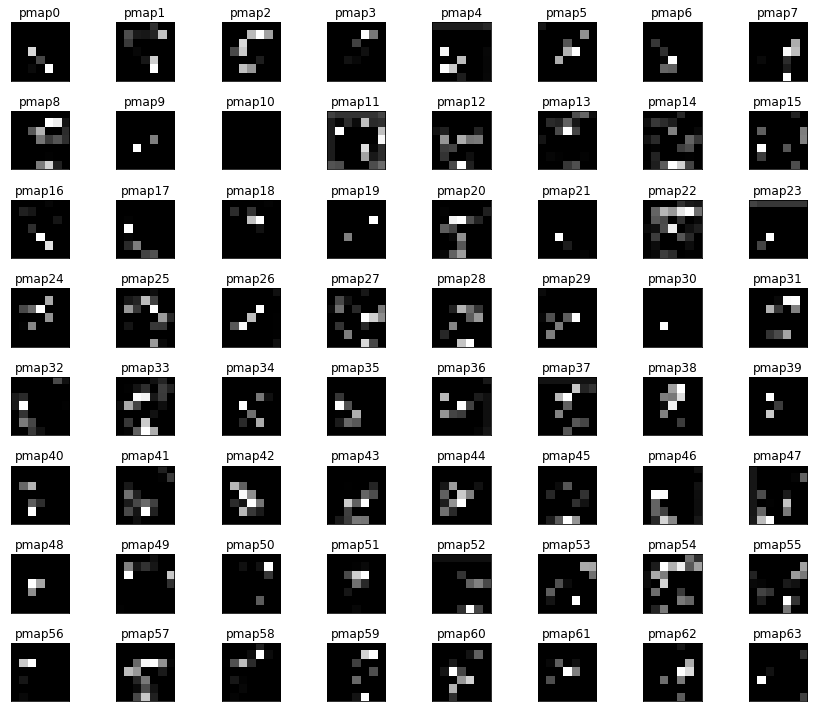

In [39]:
plt.figure(figsize=(12, 10))

for i in range(64): # i번째 풀링 맵

    plt.subplot(8,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()